# FIFA 22 Player Clustering

## Description
This is notebook to build clustering model for FIFA players. The intention is use this clustering as classification for players position. Our aim is get classification model with the most accuracy possible.

### What is FIFA 22 ?

FIFA 22 is this context is the football (soccer) video game which have teams and players based on the real world.

Football is my favorite sport and the most famous sport in the world. I think player's attributes from FIFA reflect real world attributes of each player in number properly. It's not perfect repersentation. But, I think this is good enough data. Since this is my first unsupervise learing porject, I might not get a good model compare to supervise model.

P.S. I chose FIFA 22 because it's latest version of FIFA games wich I able to find data.

## Data Overview

source : https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset

data type : CSV (110 columns)

data size : 19,239 rows (13.6 MB)

data include

- player's attributes like age, height, etc.

- URL of the scraped players

- URL of the uploaded player faces, club and nation logos

- Player positions, with the role in the club and in the national team

- Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.

- Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('players_22.csv')

/var/folders/ww/wcmtx4s5569768p2bvygj_b40000gn/T/ipykernel_6355/1344860873.py:4: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('players_22.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [4]:
data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


First, I want see all columns we have.

In [5]:
for c in data.columns:
    print(c)

sofifa_id
player_url
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


This is official data https://www.ea.com/games/fifa/fifa-22/ratings/ratings-database. So, I want to check if it match our source (kaggle) or not.

In [6]:
pd.concat([data.iloc[:,2:6], data.loc[:,'pace':'physic']], axis=1).head()

,short_name,long_name,player_positions,overall,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,85.0,92.0,91.0,95.0,34.0,65.0
1,R. Lewandowski,Robert Lewandowski,ST,92,78.0,92.0,79.0,86.0,44.0,82.0
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,87.0,94.0,80.0,88.0,34.0,75.0
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91.0,83.0,86.0,94.0,37.0,63.0
4,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,76.0,86.0,93.0,88.0,64.0,78.0


I manually check and it matchs. So, I assumed this source data is accurate.

In [7]:
data.iloc[:,2:6].describe()

,overall
count,19239.000000
mean,65.772182
std,6.880232
min,47.000000
25%,61.000000
50%,66.000000
75%,70.000000
max,93.000000


In [8]:
data.loc[:,['overall','age','height_cm','weight_kg','weak_foot','skill_moves','pace','shooting','passing','dribbling','defending','physic']].describe()

,overall,age,height_cm,weight_kg,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000
mean,65.772182,25.210822,181.299704,74.943032,2.946151,2.352461,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289
std,6.880232,4.748235,6.863179,7.069434,0.671560,0.767659,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886
min,47.000000,16.000000,155.000000,49.000000,1.000000,1.000000,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000
25%,61.000000,21.000000,176.000000,70.000000,3.000000,2.000000,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000
50%,66.000000,25.000000,181.000000,75.000000,3.000000,2.000000,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000
75%,70.000000,29.000000,186.000000,80.000000,3.000000,3.000000,76.000000,63.000000,64.000000,69.000000,64.000000,72.000000
max,93.000000,54.000000,206.000000,110.000000,5.000000,5.000000,97.000000,94.000000,93.000000,95.000000,91.000000,90.000000


In [9]:
data.loc[:,'attacking_crossing':'defending_sliding_tackle'].describe()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,...,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700
std,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,...,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683
min,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,...,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000
25%,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,...,32.000000,44.000000,26.000000,40.000000,45.000000,38.000000,50.000000,29.000000,28.000000,25.000000
50%,54.000000,50.000000,55.000000,62.000000,43.000000,61.000000,49.000000,41.000000,56.000000,63.000000,...,51.000000,58.000000,53.000000,56.000000,55.000000,49.000000,59.000000,52.000000,56.000000,53.000000
75%,63.000000,62.000000,64.000000,68.000000,56.000000,68.000000,61.000000,55.000000,64.000000,69.000000,...,62.000000,68.000000,64.000000,64.000000,64.000000,60.000000,66.000000,63.000000,65.000000,63.000000
max,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,96.000000,...,94.000000,95.000000,91.000000,96.000000,95.000000,93.000000,96.000000,93.000000,93.000000,92.000000


From tables above, data looks fine as well (player's attributes are between 0 and 100). But, there are some data missing (count less than rows) on pace, shooting, passing, dribbling, defending and physic. Therefore, we are checking it.

In [10]:
nandf = data.loc[:,['short_name','player_positions','pace','shooting','passing','dribbling','defending','physic']]
nandf = nandf[nandf.isnull().any(axis=1)]

nandf.head()

,short_name,player_positions,pace,shooting,passing,dribbling,defending,physic
5,J. Oblak,GK,NaN,NaN,NaN,NaN,NaN,NaN
7,M. Neuer,GK,NaN,NaN,NaN,NaN,NaN,NaN
8,M. ter Stegen,GK,NaN,NaN,NaN,NaN,NaN,NaN
12,T. Courtois,GK,NaN,NaN,NaN,NaN,NaN,NaN
18,Ederson,GK,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
nandf['player_positions'].unique()

array(['GK'], dtype=object)

As expected, players which have missing data are all GK (in FIFA they replace those attributes with goal keeper attributes).

## Clean Up
Remove column that we are not going to use and fill null data. And create new column which is most preferred position (pos). we will use it as responses.

First, add most preferred position column. (checked on offcial website, this first position on player_positions column is most preferred position)

In [12]:
data['pos'] =  data['player_positions'].str.split(', ').apply(lambda x: x[0])
all_pos = data['pos'].unique()

print(len(all_pos))
print(' '.join(data['pos'].unique()))

15
RW ST LW CM GK CDM CF LM CB CAM LB RB RM LWB RWB


I think 15 classes is too much. Therefore, I will merge into 4 classes FW for forward (RW ST LW CF), MF for midfield (CM CDM LM CAM RM), DE for defense (CB LB RB LWB RWB) and GK.

In [13]:
data['pos'] = data['pos'].replace(['RW','ST','LW','CF'], 'FW')
data['pos'] = data['pos'].replace(['CM','CDM','LM','CAM','RM'], 'MF')
data['pos'] = data['pos'].replace(['CB','LB','RB','LWB','RWB'], 'DE')

data['pos'].unique()

array(['FW', 'MF', 'GK', 'DE'], dtype=object)

Then, we remove useless columns.

In [14]:
data = pd.concat([data.loc[:,['pos','overall','age','height_cm','weight_kg','weak_foot','skill_moves','pace','shooting','passing','dribbling','defending','physic']], data.loc[:,'attacking_crossing':'defending_sliding_tackle']], axis=1)

data.head()

,pos,overall,age,height_cm,weight_kg,weak_foot,skill_moves,pace,shooting,passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,FW,93,34,170,72,4,4,85.0,92.0,91.0,...,94,44,40,93,95,75,96,20,35,24
1,FW,92,32,185,81,4,4,78.0,92.0,79.0,...,87,81,49,95,81,90,88,35,42,19
2,FW,91,36,187,83,4,5,87.0,94.0,80.0,...,93,63,29,95,76,88,95,24,32,24
3,FW,91,29,175,68,5,5,91.0,83.0,86.0,...,81,63,37,86,90,93,93,35,32,29
4,MF,91,30,181,70,5,4,76.0,86.0,93.0,...,91,76,66,88,94,83,89,68,65,53


Impute data, set missing player's attributes as 0

In [15]:
data = data.fillna(0)

### Visual Display

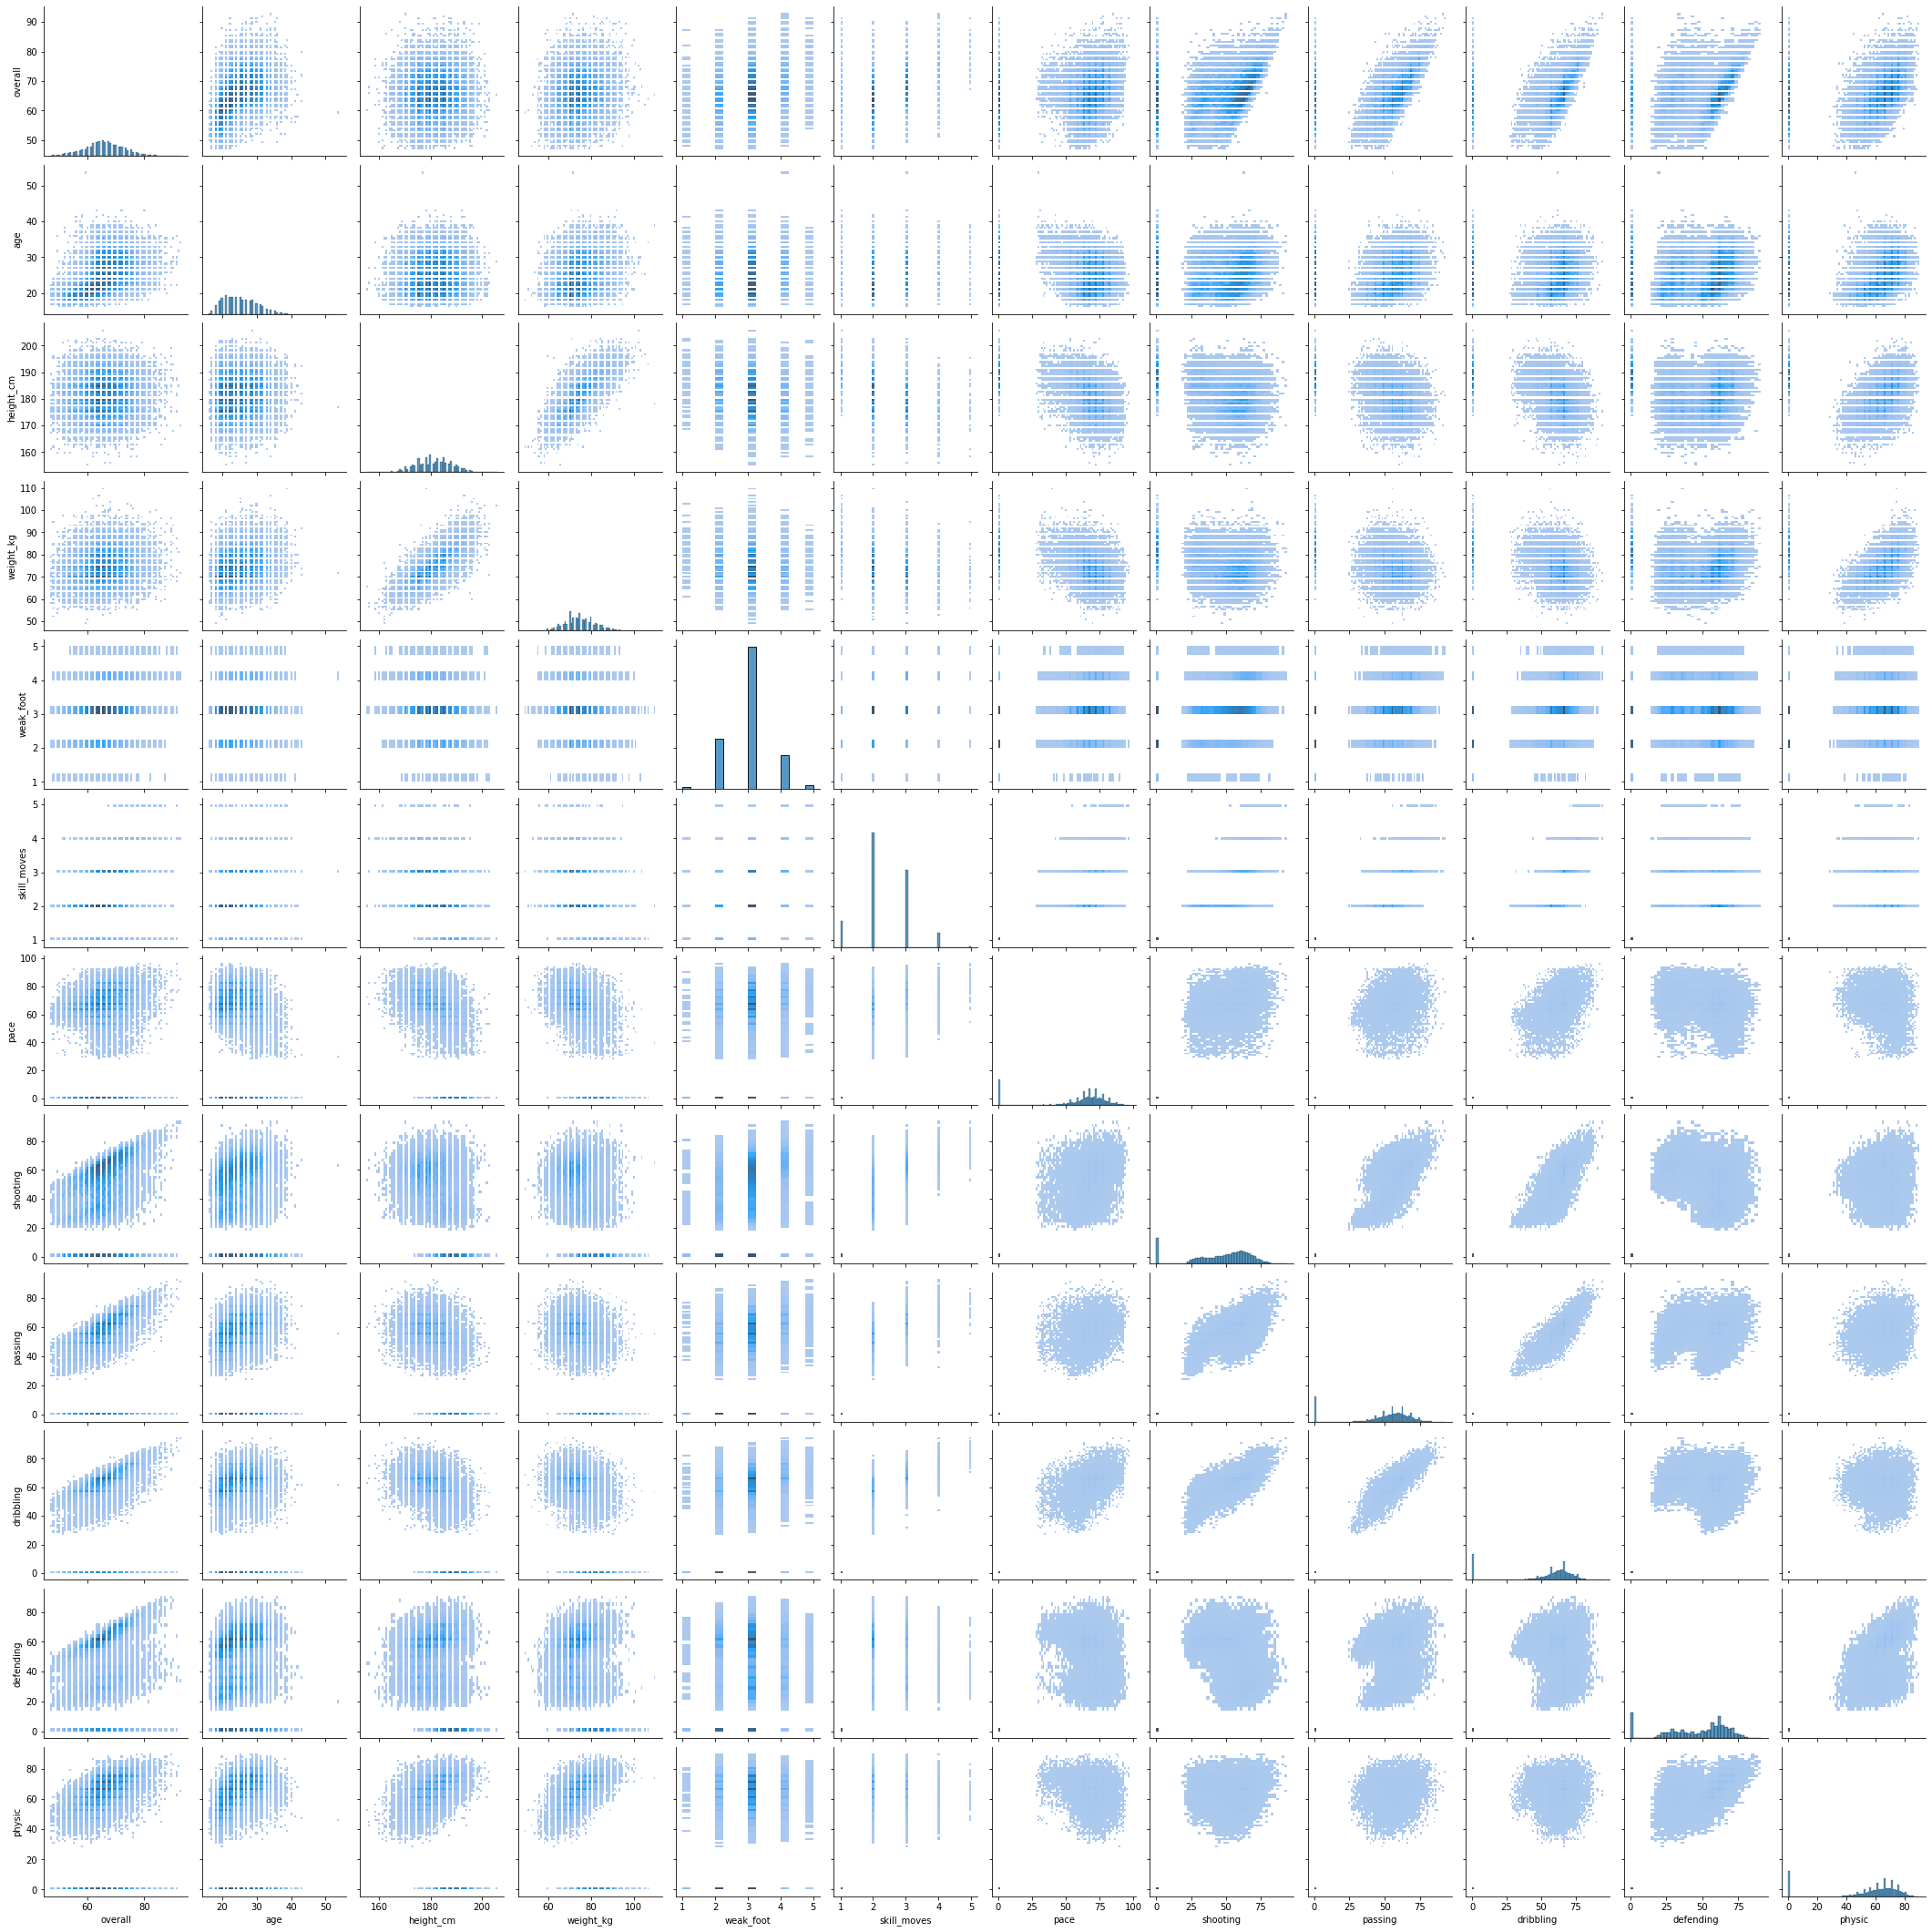

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

for_plot = data.loc[:,['overall','age','height_cm','weight_kg','weak_foot','skill_moves','pace','shooting','passing','dribbling','defending','physic']]

sns.pairplot(for_plot, kind="hist")
plt.savefig('pair_plot1.png')

I use histogram because we get more infor than normal scatter.

I filter out 0 becasue before compute correlation because data I impute will cause bias.

In [53]:
for_corr = for_plot.replace(0, np.nan)

In [54]:
corr_data = for_corr.corr()
corr_data

,overall,age,height_cm,weight_kg,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic
overall,1.000000,0.459451,0.042787,0.150324,0.223762,0.376226,0.174695,0.489623,0.715001,0.666402,0.346760,0.529234
age,0.459451,1.000000,0.083009,0.239444,0.082149,0.074076,-0.209383,0.249207,0.346893,0.202410,0.247524,0.443169
height_cm,0.042787,0.083009,1.000000,0.765465,-0.158167,-0.411341,-0.399614,-0.190318,-0.259754,-0.358324,0.199484,0.501150
weight_kg,0.150324,0.239444,0.765465,1.000000,-0.115391,-0.336606,-0.360537,-0.087062,-0.154743,-0.250922,0.197474,0.586895
weak_foot,0.223762,0.082149,-0.158167,-0.115391,1.000000,0.344650,0.144947,0.323203,0.283897,0.314096,-0.110634,0.020740
skill_moves,0.376226,0.074076,-0.411341,-0.336606,0.344650,1.000000,0.389891,0.606717,0.577815,0.672223,-0.214747,-0.055771
pace,0.174695,-0.209383,-0.399614,-0.360537,0.144947,0.389891,1.000000,0.327717,0.254596,0.496839,-0.300617,-0.197067
shooting,0.489623,0.249207,-0.190318,-0.087062,0.323203,0.606717,0.327717,1.000000,0.662207,0.777414,-0.404796,0.015722
passing,0.715001,0.346893,-0.259754,-0.154743,0.283897,0.577815,0.254596,0.662207,1.000000,0.845413,0.176874,0.166956
dribbling,0.666402,0.202410,-0.358324,-0.250922,0.314096,0.672223,0.496839,0.777414,0.845413,1.000000,-0.124781,0.018057


<AxesSubplot:>

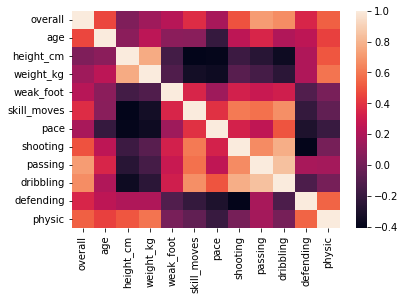

In [55]:
sns.heatmap(corr_data)

In [56]:
# listing feature pair that has strong correlation
for i in corr_data.columns:
    for j in corr_data.columns:
        if i< j and corr_data[i][j]>0.7:
            print(i,' ',j, corr_data[i][j])

overall   passing 0.7150010326789458
height_cm   weight_kg 0.7654649723878713
dribbling   shooting 0.7774137418397219
dribbling   passing 0.8454130913141136


### Analysis
From information above, we see 4 strong correlation between features (more than 0.7).

- overall and passing is indeed correlate
- height_cm and weight_kg is indeed correlate
- dribbling and shooting is new knowledge
- dribbling and passing is new knowledge

I expected weight_kg and physic, shooting and passing, skill_moves and dribbling have strong correlation (from my football knowledge). But, it doesn't. Also, I did not expected dribbling to have strong correlation with shooting and passing.

Since, those are features of football player and in reality lot of them able to play more than one position. I think we can cluster same position into same cluster. But, we would missing some.

## Clustering
for compare between model, we will use accuracy on test data to compare which model is better.
I want to use k-means first as based line.

First, split data in to train and test (test for 20%).

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('pos', axis=1), data['pos'], test_size=0.2, random_state=1992)

In [21]:
X1_train = X_train.loc[:,['overall','age','height_cm','weight_kg','weak_foot','skill_moves','pace','shooting','passing','dribbling','defending','physic', 'movement_reactions']]
X1_test = X_test.loc[:,['overall','age','height_cm','weight_kg','weak_foot','skill_moves','pace','shooting','passing','dribbling','defending','physic', 'movement_reactions']]

In [22]:
X1_train.head()

,overall,age,height_cm,weight_kg,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,movement_reactions
3482,72,26,185,71,3,3,75.0,72.0,71.0,70.0,50.0,62.0,72
4694,70,31,180,77,3,3,61.0,67.0,69.0,70.0,65.0,68.0,68
9981,65,29,196,92,3,2,44.0,69.0,47.0,57.0,29.0,76.0,70
3770,72,24,172,67,3,4,79.0,65.0,70.0,74.0,50.0,64.0,64
227,82,28,179,70,3,4,68.0,74.0,83.0,82.0,71.0,72.0,80


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1992).fit(X1_train)

In [24]:
import itertools
from sklearn.metrics import accuracy_score

ppos = ['FW', 'MF', 'DE', 'GK']

def label_permute_compare(ytdf,yp,n=4):  
    perms = list(itertools.permutations(list(range(n))))
    acc=[]
    for i in range(len(perms)):
        mapdict = dict(zip(list(ppos),list(perms[i])))
        yt = ytdf.apply(lambda x: mapdict[x])
        acc.append(accuracy_score(yt,yp))
    idx = np.argmax(acc)    
    return perms[idx], acc[idx]

In [25]:
# first model acc on training data
labelorder, acc = label_permute_compare(y_train, kmeans.labels_)
print(labelorder, acc)

(3, 2, 0, 1) 0.6757845494119941


In [26]:
ld = dict(zip(ppos,labelorder))

In [27]:
# first model acc on test data
y_pred1 = kmeans.predict(X1_test)

accuracy_score(y_test.apply(lambda x: ld[x]), y_pred1)

0.6798336798336798

In [28]:
# confusion matrix for test data
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test.apply(lambda x: ld[x]), y_pred1, labels=labelorder)

array([[650,  91,   4,   0],
       [524, 693, 217,   0],
       [  9, 387, 871,   0],
       [  0,   0,   0, 402]])

Now, we have first classification model with K-Means using 13 features. As result, we got 0.6758 accuracy on training data and 0.6798 on test data. This will be our base line. I think this is already good base line. Becuase from confusion matrix above, we get all GK position corret.

For second model, I will use K-Means clustering with all features we have.

In [29]:
# 2nd model acc on training data
kmeans2 = KMeans(n_clusters=4, random_state=1992).fit(X_train)

labelorder, acc = label_permute_compare(y_train, kmeans2.labels_)
print(labelorder, acc)

(3, 0, 1, 2) 0.7040478201546359


In [30]:
# 2nd model acc on test data
ld = dict(zip(ppos,labelorder))

y_pred2 = kmeans2.predict(X_test)

accuracy_score(y_test.apply(lambda x: ld[x]), y_pred2)

0.7042619542619543

In [31]:
# confusion matrix for test data
confusion_matrix(y_test.apply(lambda x: ld[x]), y_pred2, labels=labelorder)

array([[689,  51,   5,   0],
       [492, 736, 206,   0],
       [  2, 382, 883,   0],
       [  0,   0,   0, 402]])

As expected, our model get a bit more accuracy.

Since we have models from clustering technique which looks good for me. I will create new model using supervise technique which is k-nearest neighbors to compare wich our model to see which one is better.

In [32]:
# knn acc on tarin data
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

neigh.score(X_train, y_train)

0.927749983756741

In [33]:
# knn acc on test data
neigh.score(X_test, y_test)

0.8700623700623701

KNN with all features has more accuracy than our k-means model (0.9277 on training data and 0.8701 on test data). So, I will try another model to see if I can create better model with clustering technique.

I think Non-Negative Matrix Factorization would give us a better model. Let's find out.

In [34]:
def get_prediction(w_matrix):
    sortedMatrix = np.argsort(w_matrix)
    n_predictions, maxValue = sortedMatrix.shape
    re = sortedMatrix[:,3:].ravel()
    return re

In [35]:
# first NMF acc on training data
from sklearn.decomposition import NMF

nmfm1 = NMF(n_components=4, init='random', random_state=1992, max_iter=20000)
W1 = nmfm1.fit_transform(X_train)
H1 = nmfm1.components_

yhat1 = get_prediction(W1)

labelorder, acc = label_permute_compare(y_train, yhat1)
print(labelorder, acc)

(3, 2, 1, 0) 0.4867779871353388


In [36]:
# 2nd NMF acc on training data
nmfm2 = NMF(n_components=4, init='random', random_state=1992, max_iter=20000,beta_loss='kullback-leibler', solver='mu')
W2 = nmfm2.fit_transform(X_train)
H2 = nmfm2.components_

yhat2 = get_prediction(W2)

labelorder, acc = label_permute_compare(y_train, yhat2)
print(labelorder, acc)

(0, 1, 3, 2) 0.7328958482229875


In [37]:
def nmfx(a):
    nmfm = NMF(n_components=4, init='random', random_state=1992, max_iter=20000,beta_loss='kullback-leibler', solver='mu', alpha_W=a)
    W = nmfm.fit_transform(X_train)

    yhat = get_prediction(W)

    return label_permute_compare(y_train, yhat)

In [38]:
bi = 0
bacc = 0
blabelorder = []
for i in range(10):    
    labelorder, acc = nmfx(i*0.01)
    if acc > bacc:
        bacc = acc
        blabelorder = labelorder
        bi = i*0.01
print(bi, bacc, blabelorder)

0.02 0.7513481905009421 (0, 1, 3, 2)


In [39]:
# NMF with best alpha_W acc on training data
nmfmb = NMF(n_components=4, init='random', random_state=1992, max_iter=20000,beta_loss='kullback-leibler', solver='mu', alpha_W=0.02)
Wb = nmfmb.fit_transform(X_train)

yhatb = get_prediction(Wb)

labelorder, acc = label_permute_compare(y_train, yhatb)
print(labelorder, acc)

(0, 1, 3, 2) 0.7513481905009421


In [40]:
# NMF with best alpha_W acc on test data
test_yhat = get_prediction(nmfmb.transform(X_test))
labelorder, acc = label_permute_compare(y_test, test_yhat)
print(labelorder, acc)

(0, 1, 3, 2) 0.7492203742203742


In [41]:
# NMF with tol=0.00005 acc on train data
nmfm4 = NMF(n_components=4, init='random', random_state=1992, max_iter=20000,beta_loss='kullback-leibler', solver='mu', alpha_W=0.02,tol=0.00005)
W4 = nmfm4.fit_transform(X_train)

yhat4 = get_prediction(W4)

labelorder, acc = label_permute_compare(y_train, yhat4)
print(labelorder, acc)

(0, 1, 3, 2) 0.7523877590799818


In [42]:
# NMF with tol=0.00005 NMF acc on test data
test_yhat4 = get_prediction(nmfm4.transform(X_test))
labelorder, acc = label_permute_compare(y_test, test_yhat4)
print(labelorder, acc)

(0, 1, 3, 2) 0.7481808731808732


So, best NMF model after tuning hyperparameter has accuracy 0.7513 on training data and 0.7482 on test data. You can see that actually NMF with tol=0.00005 have more accuracy on training data but it over-fitted. I think this is the best model with NMF I can build.

Next, I will try to tune hyperparameter for k-means.

In [43]:
# 3rd model acc on training data
kmeans3 = KMeans(n_clusters=4, random_state=1992, init='random', max_iter=4000, n_init=30, algorithm='elkan').fit(X_train)

labelorder, acc = label_permute_compare(y_train, kmeans3.labels_)
print(labelorder, acc)

(2, 0, 3, 1) 0.7040478201546359


From what I tried, tuning hyperparameter for k-means not gain any accuracy.

Last, I will try hierarchical clustering

In [57]:
from sklearn.cluster import AgglomerativeClustering

# 1st model acc on training data
hi1 = AgglomerativeClustering(n_clusters=4, affinity='manhattan' , linkage='single').fit(X1_train)

labelorder, acc = label_permute_compare(y_train, hi1.labels_)
print(labelorder, acc)

(2, 0, 3, 1) 0.4761873822363719


In [45]:
# 2nd model acc on training data
hi2 = AgglomerativeClustering(n_clusters=4, affinity='manhattan' , linkage='single').fit(X_train)

labelorder, acc = label_permute_compare(y_train, hi2.labels_)
print(labelorder, acc)

(3, 0, 2, 1) 0.47631732830875184


First hierarchical clustering not perform well. So, hyperparameter tuning would help.

In [46]:
metrics = ["euclidean","l1","l2","manhattan","cosine"]
linkages = ["complete","average","single"]
maxx = 0
mm = ""
ll = ""

for m in metrics:
    for l in linkages:
        nmodel = AgglomerativeClustering(n_clusters=5, affinity=m , linkage=l).fit(X_train)
        nlabelorder, acc = label_permute_compare(y_train, nmodel.labels_)
        print('matric =',m,' and linkage =',l,'acc =', acc)
        if acc>maxx:
            maxx=acc
            mm=m
            ll=l
print('best parameter :',mm,ll, 'acc =',maxx)

# for affinity='euclidean' linkage='ward'
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean' , linkage='ward').fit(X_train)
labelorder, acc = label_permute_compare(y_train, model2.labels_)
print('labelorder =',labelorder)
print('accuracy =', acc)

matric = euclidean  and linkage = complete acc = 0.48274965889156
matric = euclidean  and linkage = average acc = 0.6270547722695081
matric = euclidean  and linkage = single acc = 0.4761873822363719
matric = l1  and linkage = complete acc = 0.5110129296342018
matric = l1  and linkage = average acc = 0.6527840946007407
matric = l1  and linkage = single acc = 0.47631732830875184
matric = l2  and linkage = complete acc = 0.48274965889156
matric = l2  and linkage = average acc = 0.6270547722695081
matric = l2  and linkage = single acc = 0.4761873822363719
matric = manhattan  and linkage = complete acc = 0.5110129296342018
matric = manhattan  and linkage = average acc = 0.6527840946007407
matric = manhattan  and linkage = single acc = 0.47631732830875184
matric = cosine  and linkage = complete acc = 0.5572737314014684
matric = cosine  and linkage = average acc = 0.6265999610161783
matric = cosine  and linkage = single acc = 0.47599246312780197
best parameter : l1 average acc = 0.65278409460

The best accuracy we can get from hierarchical clustering on training data is 0.6528 which is worst than NMF.

As result, the best model with unsupervise approch by Non-Negative Matrix Factorization is 0.7482.

## Conclusion
For this problem first we look at overview of data we have. Then, we verify it with official site. After that we clean up data and run analysis. Since we have every thing ready, we build models with unsupervise and supervise techniques. So, we get best unsupervise model wich is using NMF which 0.7482 on test data and KNN wih 0.8701 on test data as supervise model. As result, for this problem KNN wihch is supervise have better accuracy than NMF wich is best unsupervise model about 0.12. In my opinion NMF is doing a good job because the model does not use label of the data on trainig. I think if I have more experience I might build better model. I think this can be improve. But this is the best for me currently.

github : https://github.com/Satjarporn/FIFA